#  MNIST MLP 실습 (TensorFlow + Sequential)

이 실습에서는 손글씨 숫자 이미지 데이터인 **MNIST**를 가지고 다층 퍼셉트론(MLP) 모델을 학습시킵니다.
MNIST는 28x28 크기의 흑백 숫자 이미지로 구성되어 있으며, 0~9까지 10개의 숫자로 분류됩니다.
우리는 데이터를 불러오고, 정규화하며, MLP 모델을 구성하고 학습, 평가, 시각화까지 실습합니다.

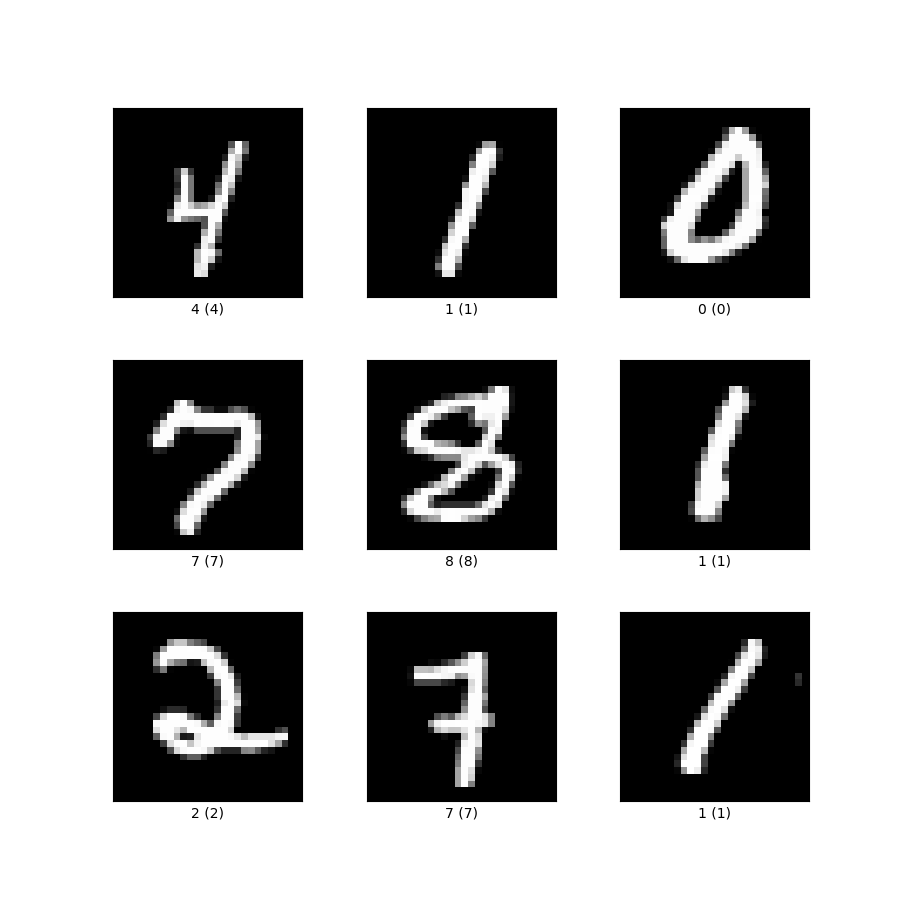

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# 설치된 나눔폰트 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 등록
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path).get_name()

# 기본 폰트 설정
plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False



## 데이터 불러오기 및 전처리

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터 크기: (60000, 28, 28), 테스트 데이터 크기: (10000, 28, 28)


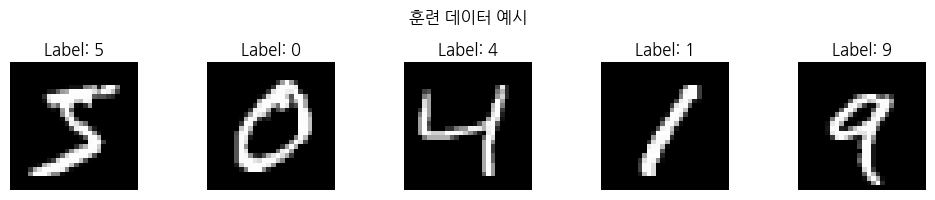

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("훈련 데이터 예시")
plt.tight_layout()
plt.show()

## MLP 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

##Quiz1. MLP 모델 구조 수정해보기
기존 MLP 모델은 은닉층이 하나이고 노드 수가 128개였습니다.
이제 다음 조건을 모두 만족하는 새로운 모델을 직접 구성해보세요.

### 구성 조건


### 1. 입력층
- 입력 형태: `(28, 28)` 크기의 흑백 이미지
- `Flatten` 층을 사용하여 `(784,)` 차원의 1D 벡터로 변환

### 2. 은닉층 구성
- 총 2개의 `Dense` 은닉층 사용
- 각 은닉층 뒤에 `Dropout`을 추가하여 과적합 방지


### 3. 첫 번째 은닉층
- 노드 수: `64`
- 활성화 함수: `'relu'`
- 드롭아웃 비율: `0.3`


### 4. 두 번째 은닉층
- 노드 수: `256`
- 활성화 함수: `'relu'`
- 드롭아웃 비율: `0.3`


### 5. 출력층
- 노드 수: `10`
- 활성화 함수: `'softmax'`
- 목적: **10개 클래스에 대한 다중 분류** (예: MNIST 숫자 분류)


### 6. 모델 요약 출력
- `model.summary()` 명령을 통해 **모델의 전체 구조와 학습 가능한 파라미터 수 확인**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),                      # 은닉층 1 후 Dropout 추가
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),                      # 은닉층 2 후 Dropout 추가
    layers.Dense(10, activation='softmax')
])
model.summary()

## 모델 컴파일 및 학습

In [ ]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = mlp_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8409 - loss: 0.5384 - val_accuracy: 0.9632 - val_loss: 0.1300
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9523 - loss: 0.1653 - val_accuracy: 0.9735 - val_loss: 0.0940
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9647 - loss: 0.1210 - val_accuracy: 0.9758 - val_loss: 0.0833
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9714 - loss: 0.0926 - val_accuracy: 0.9768 - val_loss: 0.0774
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9768 - loss: 0.0768 - val_accuracy: 0.9798 - val_loss: 0.0730
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9796 - loss: 0.0673 - val_accuracy: 0.9822 - val_loss: 0.0718
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9815 - loss: 0.0574 - val_accuracy: 0.9807 - val_loss: 0.0719
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0518 

## 학습 정확도 및 손실 시각화

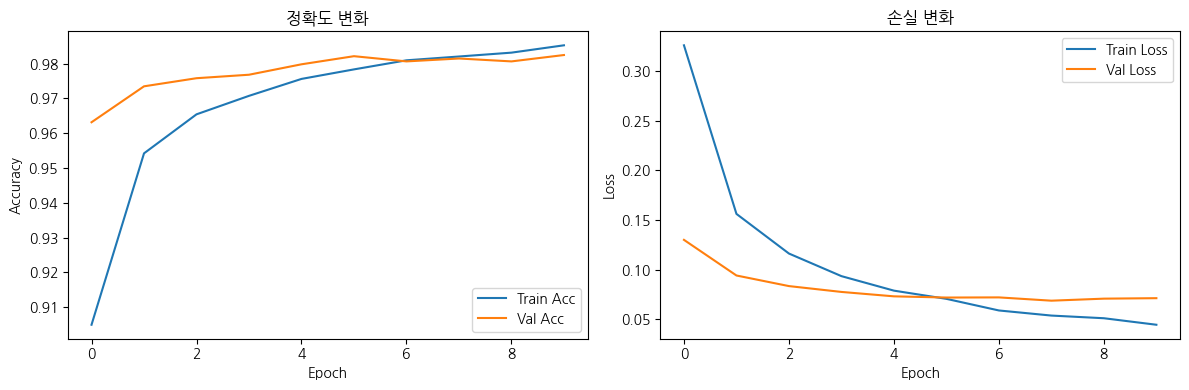

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('정확도 변화')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('손실 변화')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## 테스트 데이터 평가

In [ ]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test, y_test)
print(f"\n최종 MLP 모델 테스트 정확도: {mlp_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0808

최종 MLP 모델 테스트 정확도: 0.9806


## 예측 결과 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


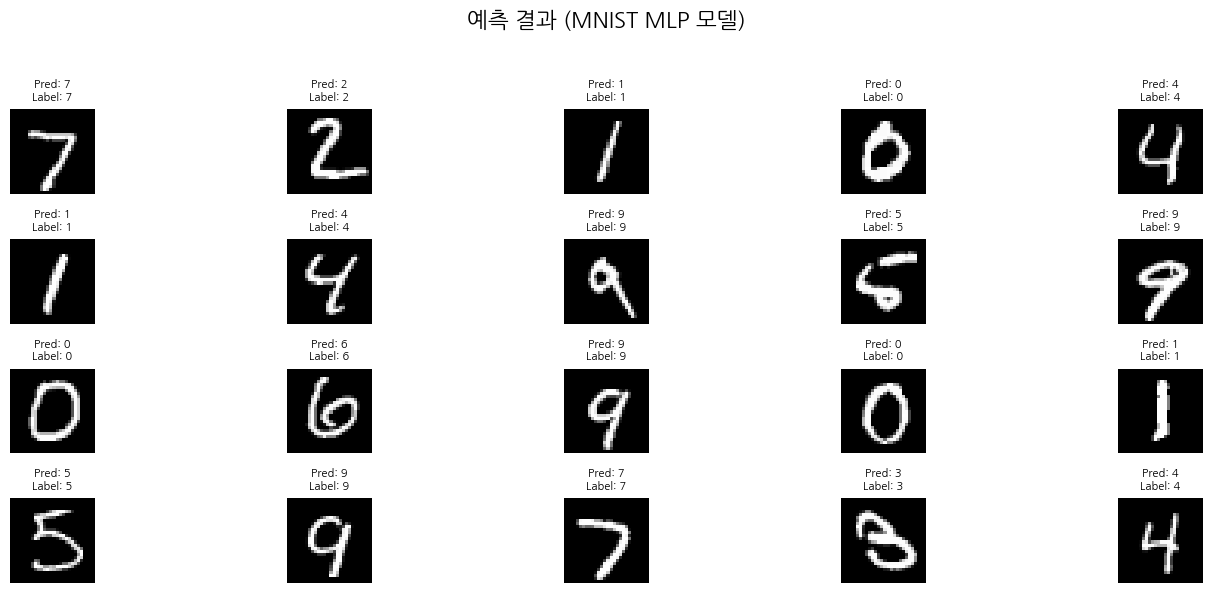

In [ ]:
predictions = mlp_model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nLabel: {y_test[i]}", fontsize=8)
    plt.axis('off')
plt.suptitle("예측 결과 (MNIST MLP 모델)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()